In [1]:
from AntController.AntEnvironment import AntIRLEnvironment
from AntController.HaikuActorCritic import EpisodeWithValue, HaikuActorCritic

In [2]:
import matplotlib
import numpy as np
import gym
import yaml
from collections import deque

<IPython.core.display.Javascript object>


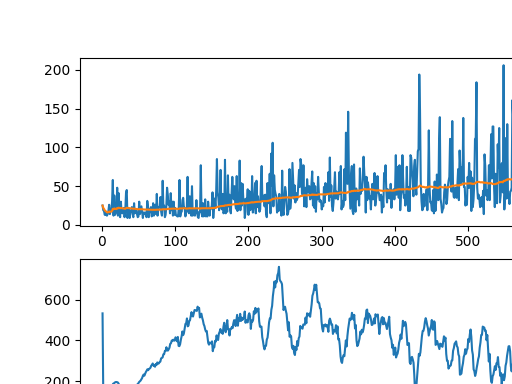

/home/charlie/.local/lib/python3.8/site-packages/jax/_src/lax/lax.py:6271: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


KeyboardInterrupt: 

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt



# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
raw_reward_plot, = ax.plot([], [])
reward_ma_plot, =  ax.plot([], [])
value_plot, =  ax2.plot([], [])
np.random.seed(0)
path = "AntController/configs/cartpole_aac_config.yaml"
with open(path) as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
env_ = gym.make("CartPole-v1")
aac = HaikuActorCritic(config)
show = False
rewards = deque(maxlen=100)

while True:
    episode_data_, value_loss = aac.run_episode_and_train(env_, show, not show)
    #print("Episode {} with rewards {}".format(aac.episode_count, np.sum(episode_data_.rewards)))
    rewards.append(np.sum(episode_data_.rewards))
    if np.mean(rewards) > 195.0 and not show:
        print("Solved!")
        show = True
    reward_ma_plot.set_ydata(np.append(reward_ma_plot.get_ydata(), np.mean(rewards)))
    reward_ma_plot.set_xdata(np.append(reward_ma_plot.get_xdata(), np.mean(aac.episode_count)))
    raw_reward_plot.set_ydata(np.append(raw_reward_plot.get_ydata(), np.sum(episode_data_.rewards)))
    raw_reward_plot.set_xdata(np.append(raw_reward_plot.get_xdata(), np.mean(aac.episode_count)))
    value_plot.set_xdata(np.append(value_plot.get_xdata(), np.mean(aac.episode_count)))
    value_plot.set_ydata(np.append(value_plot.get_ydata(), value_loss))
    ax.relim()
    ax.autoscale_view() 
    ax2.relim()
    ax2.autoscale_view() 
    fig.canvas.draw()
    fig.canvas.flush_events()


